In [3]:
import requests

data = requests.get('http://localhost:8080/users').json()
print(data)

[[6, 'Danny Torrances Finger'], [2, 'Leia Organa'], [3, 'Tony Stark'], [4, 'Ellen Ripley'], [5, 'J. Jonah Jameson'], [7, 'Danny Torrance'], [0, 'John Wick'], [1, 'Mike Wazowski'], [8, 'Mario Bru'], [9, 'Felipe Ferrero'], [10, 'Marc Pomar'], [11, 'Julio Porto'], [12, 'Chiquito de la Calzada'], [13, 'Javi Garzas'], [14, 'Clara'], [15, 'Joaquin'], [16, 'Toni Pons'], [17, 'Seora'], [18, 'Gandalf'], [19, 'Celia'], [20, 'Maria']]


### Create User:

In [27]:
new_name = {'name': 'Clarita'}
userid = requests.post("http://localhost:8080/user/create", data=new_name).json()
print(userid)

{'error': 'This name already exists! Try a new one ;)'}


### Create chat:

In [9]:
chatid = requests.post("http://localhost:8080/chat/create").json()
print(chatid)

{'chatid': 10}


### Add Message:

In [40]:
new_message = {'userid': 98, 'message': "Probando"}
requests.post("http://localhost:8080/chat/28/addmessage", data=new_message)

<Response [500]>

### Get messages in chat:

In [5]:
messages = requests.get('http://localhost:8080/chat/0/list').json()
print(messages)

[['Hey Mike, whats up??'], ['Dude!!! 😀️ Did you watch the game last night?'], ['No, had to work. How was it?'], ['Awesome! Boyander scored 3 goals!'], ['No way! 😮️'], ['Way...'], ['I bet people went crazy'], ['For sure. We stayed at KuboLoco until 6AM.'], ['Motherfucker! Hungover? 😵️'], ['Dead, burried and still suffering! \U0001f92e️'], ['Paracetamol is your best friend :P'], ['Boyander is the fucking master!'], ['Lets go to have lunch']]


### Get messages from user:

In [43]:
messages = requests.get('http://localhost:8080/user/0/listmessages').json()
print(messages)

[['Hey Mike, whats up??'], ['No, had to work. How was it?'], ['No way! 😮️'], ['I bet people went crazy'], ['Motherfucker! Hungover? 😵️'], ['Sure, boss.'], ['I do! I just dont feel appreciated in my job'], ['I dunno...'], ['Maybe'], ['Thank you, boss! I feel much better...'], ['Paracetamol is your best friend :P']]


### Sentiment analysis:

In [6]:
import nltk # install nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

sid = SentimentIntensityAnalyzer()

sid.polarity_scores("Happy")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mariobru/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}

In [35]:
polarity = 0
subjectivity = 0
for e in messages:

    polarity += TextBlob(*e).sentiment[0]
    subjectivity += TextBlob(*e).sentiment[1]

In [36]:
polarity_mean = polarity/len(messages)
subjectivity_mean = subjectivity/len(messages)

print("The polarity mean is {} and the subjectivity mean is {}".format(polarity_mean,subjectivity_mean))

The polarity mean is 0.04423076923076925 and the subjectivity mean is 0.37478632478632473


In [37]:
def chatSent(idchat):
    id_chat = str(idchat)
    URL = 'http://localhost:8080/chat/{}/list'.format(id_chat)
    messages = requests.get(URL).json()
    polarity = 0
    subjectivity = 0
    for e in messages:
        polarity += TextBlob(*e).sentiment[0]
        subjectivity += TextBlob(*e).sentiment[1]
    polarity_mean = polarity/len(messages)
    subjectivity_mean = subjectivity/len(messages)
    return {'Polarity mean': polarity_mean, 'Subjectivity mean': subjectivity_mean}

In [39]:
chatSent(0)

{'Polarity mean': 0.04423076923076925,
 'Subjectivity mean': 0.37478632478632473}

### Recommendation

In [55]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity as distance

In [56]:
data = requests.get('http://localhost:8080/users').json()
print(data)

[[6, 'Danny Torrances Finger'], [2, 'Leia Organa'], [3, 'Tony Stark'], [4, 'Ellen Ripley'], [5, 'J. Jonah Jameson'], [0, 'John Wick'], [1, 'Mike Wazowski'], [8, 'Mario Bru'], [9, 'Felipe Ferrero'], [10, 'Marc Pomar'], [11, 'Julio Porto'], [12, 'Chiquito de la Calzada'], [13, 'Javi Garzas'], [14, 'Clara'], [7, 'Pepito de los palotes']]


In [59]:
docs = dict()
for u in data:
    messages = requests.get('http://localhost:8080/user/{}/messages'.format(u[0])).json()
    mestring = ' '.join([data for ele in messages for data in ele])
    docs.update({u[1]:mestring})
    
print(docs)

{'Danny Torrances Finger': 'REDRUM REDRUM REDRUM REDRUM Murder, bro, cold blooded splashy murderous fun A nice day to create havoc! Fishing sounds good. What about the labyrinth?', 'Leia Organa': 'Im so angry right now! Impossible! Cant do it! Just cant! He pissed me off so much. But how am I suposed to fix the facial recognition system if it doesnt even work? And who the hell is Tony? \U0001f92f️ Oh shit. I think youre friends with my brother.', 'Tony Stark': 'I saw you this morning. You shouldnt get so upset. ❤️ Dont get so frustrated, Leia. Remember what German said. Im sure you will find a way. I am Iron Man Uh-Oh. Better fix that quickly.', 'Ellen Ripley': 'Not again, Michael.... 😒️ Im gonna report you to Human Resources again, Michael. Id rather have a fucking alien crawling out of my ass Ok, youve got to stop drinking! Im calling HR. Dude... Alcoholics Anonymous: https://www.aa.org', 'J. Jonah Jameson': 'I want pictures of Spiderman and I want them now! Youve got to take me seri

In [60]:
# Create the Document Term Matrix
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(docs.values())
sparse_matrix

<15x249 sparse matrix of type '<class 'numpy.int64'>'
	with 352 stored elements in Compressed Sparse Row format>

In [61]:
# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=docs.keys())

In [62]:
# Compute Cosine Similarity matrix (or selected distance)
similarity_matrix = distance(df, df)
print(similarity_matrix)

[[1.         0.06900656 0.02577696 0.04984448 0.0808122  0.0243975
  0.06104677 0.         0.05634362 0.12777531 0.05096472 0.
  0.05096472 0.12073632 0.12888482]
 [0.06900656 1.         0.16601942 0.10032154 0.14638501 0.19641855
  0.18020684 0.05143445 0.27216553 0.2057378  0.08206099 0.0860663
  0.20515248 0.23328474 0.06225728]
 [0.02577696 0.16601942 1.         0.11242344 0.12758946 0.15407891
  0.16522803 0.05763904 0.05083286 0.         0.04598005 0.09644856
  0.04598005 0.06535653 0.13953488]
 [0.04984448 0.10032154 0.11242344 1.         0.24671758 0.08512565
  0.12424948 0.         0.04914732 0.         0.13336627 0.
  0.08891084 0.10531568 0.08993875]
 [0.0808122  0.14638501 0.12758946 0.24671758 1.         0.08625819
  0.20144406 0.         0.11952286 0.09035079 0.1081125  0.
  0.0360375  0.22197103 0.07290826]
 [0.0243975  0.19641855 0.15407891 0.08512565 0.08625819 1.
  0.15638581 0.10910895 0.09622504 0.         0.04351941 0.
  0.08703883 0.14433757 0.13206764]
 [0.061046

,Danny Torrances Finger,Leia Organa,Tony Stark,Ellen Ripley,J. Jonah Jameson,John Wick,Mike Wazowski,Mario Bru,Felipe Ferrero,Marc Pomar,Julio Porto,Chiquito de la Calzada,Javi Garzas,Clara,Pepito de los palotes
Danny Torrances Finger,1.000000,0.069007,0.025777,0.049844,0.080812,0.024398,0.061047,0.000000,0.056344,0.127775,0.050965,0.000000,0.050965,0.120736,0.128885
Leia Organa,0.069007,1.000000,0.166019,0.100322,0.146385,0.196419,0.180207,0.051434,0.272166,0.205738,0.082061,0.086066,0.205152,0.233285,0.062257
Tony Stark,0.025777,0.166019,1.000000,0.112423,0.127589,0.154079,0.165228,0.057639,0.050833,0.000000,0.045980,0.096449,0.045980,0.065357,0.139535
Ellen Ripley,0.049844,0.100322,0.112423,1.000000,0.246718,0.085126,0.124249,0.000000,0.049147,0.000000,0.133366,0.000000,0.088911,0.105316,0.089939
J. Jonah Jameson,0.080812,0.146385,0.127589,0.246718,1.000000,0.086258,0.201444,0.000000,0.119523,0.090351,0.108112,0.000000,0.036037,0.221971,0.072908
John Wick,0.024398,0.196419,0.154079,0.085126,0.086258,1.000000,0.156386,0.109109,0.096225,0.000000,0.043519,0.000000,0.087039,0.144338,0.132068
Mike Wazowski,0.061047,0.180207,0.165228,0.124249,0.201444,0.156386,1.000000,0.000000,0.120386,0.091003,0.108893,0.114208,0.072595,0.154782,0.183587
Mario Bru,0.000000,0.051434,0.057639,0.000000,0.000000,0.109109,0.000000,1.000000,0.125988,0.000000,0.000000,0.000000,0.113961,0.161985,0.000000
Felipe Ferrero,0.056344,0.272166,0.050833,0.049147,0.119523,0.096225,0.120386,0.125988,1.000000,0.251976,0.000000,0.000000,0.301511,0.285714,0.050833
Marc Pomar,0.127775,0.205738,0.000000,0.000000,0.090351,0.000000,0.091003,0.000000,0.251976,1.000000,0.000000,0.000000,0.227921,0.431959,0.115278


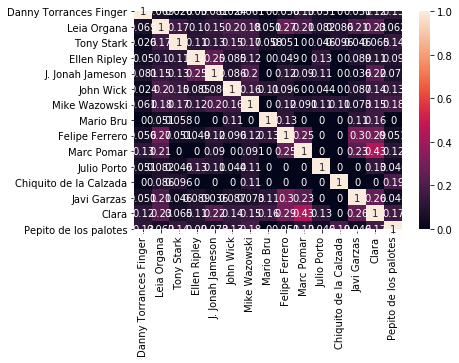

In [63]:
# Convert it to dataframe to visualize with seaborn
import seaborn as sns
sim_df = pd.DataFrame(similarity_matrix, columns=docs.keys(), index=docs.keys())
display(sim_df)

In [65]:
# Max similarities of related documents
np.fill_diagonal(sim_df.values, 0) # Remove diagonal max values and set those to 0
sim_df

,Danny Torrances Finger,Leia Organa,Tony Stark,Ellen Ripley,J. Jonah Jameson,John Wick,Mike Wazowski,Mario Bru,Felipe Ferrero,Marc Pomar,Julio Porto,Chiquito de la Calzada,Javi Garzas,Clara,Pepito de los palotes
Danny Torrances Finger,0.000000,0.069007,0.025777,0.049844,0.080812,0.024398,0.061047,0.000000,0.056344,0.127775,0.050965,0.000000,0.050965,0.120736,0.128885
Leia Organa,0.069007,0.000000,0.166019,0.100322,0.146385,0.196419,0.180207,0.051434,0.272166,0.205738,0.082061,0.086066,0.205152,0.233285,0.062257
Tony Stark,0.025777,0.166019,0.000000,0.112423,0.127589,0.154079,0.165228,0.057639,0.050833,0.000000,0.045980,0.096449,0.045980,0.065357,0.139535
Ellen Ripley,0.049844,0.100322,0.112423,0.000000,0.246718,0.085126,0.124249,0.000000,0.049147,0.000000,0.133366,0.000000,0.088911,0.105316,0.089939
J. Jonah Jameson,0.080812,0.146385,0.127589,0.246718,0.000000,0.086258,0.201444,0.000000,0.119523,0.090351,0.108112,0.000000,0.036037,0.221971,0.072908
John Wick,0.024398,0.196419,0.154079,0.085126,0.086258,0.000000,0.156386,0.109109,0.096225,0.000000,0.043519,0.000000,0.087039,0.144338,0.132068
Mike Wazowski,0.061047,0.180207,0.165228,0.124249,0.201444,0.156386,0.000000,0.000000,0.120386,0.091003,0.108893,0.114208,0.072595,0.154782,0.183587
Mario Bru,0.000000,0.051434,0.057639,0.000000,0.000000,0.109109,0.000000,0.000000,0.125988,0.000000,0.000000,0.000000,0.113961,0.161985,0.000000
Felipe Ferrero,0.056344,0.272166,0.050833,0.049147,0.119523,0.096225,0.120386,0.125988,0.000000,0.251976,0.000000,0.000000,0.301511,0.285714,0.050833
Marc Pomar,0.127775,0.205738,0.000000,0.000000,0.090351,0.000000,0.091003,0.000000,0.251976,0.000000,0.000000,0.000000,0.227921,0.431959,0.115278


In [69]:
res = {'recommended_users': [e for e in list(sim_df[name].sort_values(ascending=False)[0:3].index)]}

In [70]:
res

{'recommended_users': ['Clara', 'Felipe Ferrero', 'Javi Garzas']}

In [68]:
sim_df.idxmax()

Danny Torrances Finger     Pepito de los palotes
Leia Organa                       Felipe Ferrero
Tony Stark                           Leia Organa
Ellen Ripley                    J. Jonah Jameson
J. Jonah Jameson                    Ellen Ripley
John Wick                            Leia Organa
Mike Wazowski                   J. Jonah Jameson
Mario Bru                                  Clara
Felipe Ferrero                       Javi Garzas
Marc Pomar                                 Clara
Julio Porto                         Ellen Ripley
Chiquito de la Calzada     Pepito de los palotes
Javi Garzas                       Felipe Ferrero
Clara                                 Marc Pomar
Pepito de los palotes     Chiquito de la Calzada
dtype: object